In [11]:
import re
from urllib.request import urlopen
from bs4 import BeautifulSoup, SoupStrainer
import pandas as pd

In [12]:
# see what's in the data
banks = pd.read_csv('./bimpact/bimpact.csv')
banks.head(2)

,company_name,description,overall_score,impact_area_environment,industry,industry_category,products_and_services,sector,country,state,city,sector_2,size,website
0,Tomorrow GmbH,Tomorrow is the first European player to link ...,118.1,11.0,Investment Advisor,Financial Services,Mobile banking for a better future,Service with Minor Environmental Footprint,Germany,Hamburg,Hamburg,Service with Minor Environmental Footprint,10-49,www.tomorrow.one/en-de
1,"MicroVest Capital Management, LLC",MicroVest is an asset manager that specializes...,103.2,4.7,Equity Investor - Emerging Markets,Financial Services,Provides investment advisory services to priva...,Service with Minor Environmental Footprint,United States,Maryland,Bethesda,Service with Minor Environmental Footprint,10-49,www.microvestfund.com


In [7]:
# notice that there are still some lenders who aren't banks.
# remove those
banks = banks[banks.description.str.contains('bank', case=False)]
banks.head(4)

,company_name,description,overall_score,impact_area_environment,industry,industry_category,products_and_services,sector,country,state,city,sector_2,size,website
0,Tomorrow GmbH,Tomorrow is the first European player to link ...,118.1,11.0,Investment Advisor,Financial Services,Mobile banking for a better future,Service with Minor Environmental Footprint,Germany,Hamburg,Hamburg,Service with Minor Environmental Footprint,10-49,www.tomorrow.one/en-de
1,"MicroVest Capital Management, LLC",MicroVest is an asset manager that specializes...,103.2,4.7,Equity Investor - Emerging Markets,Financial Services,Provides investment advisory services to priva...,Service with Minor Environmental Footprint,United States,Maryland,Bethesda,Service with Minor Environmental Footprint,10-49,www.microvestfund.com
2,Beneficial State Bank,"Beneficial State Bank is an innovative, triple...",176.0,20.4,Credit Provider,Financial Services,Community Development Financial Institution,Service with Minor Environmental Footprint,United States,California,Oakland,Service with Minor Environmental Footprint,50-249,www.beneficialstate.com
3,Business Development Bank of Canada,BDC is the only bank devoted exclusively to en...,96.5,1.8,Other,Financial Services,"Loans, investments and advisory services for SMEs",Service with Minor Environmental Footprint,Canada,Québec,Montreal (head office),Service with Minor Environmental Footprint,1000+,www.bdc.ca


In [8]:
# How many banks do we have in the dataset?
print('There are ' + str(len(banks)) + ' in the b-corp dataset')

There are 44 in the b-corp dataset


<AxesSubplot:>

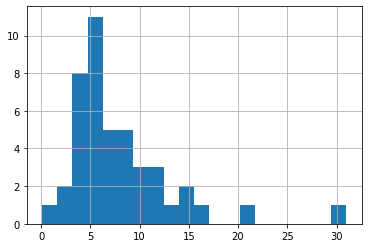

In [9]:
# visualize environmental banking scores
banks.impact_area_environment.hist(bins=20)

In [13]:
banks[banks['country'] == 'United States'] 

,company_name,description,overall_score,impact_area_environment,industry,industry_category,products_and_services,sector,country,state,city,sector_2,size,website
1,"MicroVest Capital Management, LLC",MicroVest is an asset manager that specializes...,103.2,4.7,Equity Investor - Emerging Markets,Financial Services,Provides investment advisory services to priva...,Service with Minor Environmental Footprint,United States,Maryland,Bethesda,Service with Minor Environmental Footprint,10-49,www.microvestfund.com
2,Beneficial State Bank,"Beneficial State Bank is an innovative, triple...",176.0,20.4,Credit Provider,Financial Services,Community Development Financial Institution,Service with Minor Environmental Footprint,United States,California,Oakland,Service with Minor Environmental Footprint,50-249,www.beneficialstate.com
4,"Keene Advisors, Inc.",Keene Advisors is a boutique investment bank a...,95.4,5.6,Other,Financial Services,"Business, consulting and financial services",Service with Minor Environmental Footprint,United States,Massachusetts,Boston,Service with Minor Environmental Footprint,1-9,www.keeneadvisors.com
5,Envest Microfinance,Envest is a for-profit global microfinance fun...,96.5,5.6,Other,Financial Services,"Microfinance lending, socially responsible inv...",Service with Minor Environmental Footprint,United States,Wisconsin,Madison,Service with Minor Environmental Footprint,1-9,envestmicrofinance.org
7,Partnership Capital Growth,Partnership Capital Growth Advisor facilitates...,116.5,3.7,Equity Investor - Developed Markets,Financial Services,Financial Services and Investment,Service with Minor Environmental Footprint,United States,California,Los Gatos,Service with Minor Environmental Footprint,1-9,www.pcg-advisors.com
11,Spring Bank,Spring Bank is an FDIC insured community bank ...,136.2,5.2,Credit Provider,Financial Services,"Loans, deposits",Service with Minor Environmental Footprint,United States,New York,Bronx,Service with Minor Environmental Footprint,10-49,www.springbankny.com
12,Amalgamated Bank,Amalgamated Bank has always been a different k...,115.1,16.0,Credit Provider,Financial Services,Financial Services,Service with Minor Environmental Footprint,United States,New York,New York City,Service with Minor Environmental Footprint,250-999,www.amalgamatedbank.com
17,Greenline Community Ventures LLC,Greenline Community Ventures LLC is a minority...,110.7,4.0,Equity Investor - Developed Markets,Financial Services,"Capital Market Solutions, Community Development",Service with Minor Environmental Footprint,United States,Colorado,Denver,Service with Minor Environmental Footprint,10-49,www.greenlineventures.com
18,Mascoma Bank,Mascoma Savings Bank is mutually owned and not...,114.9,7.5,Credit Provider,Financial Services,Financial Services,Service with Minor Environmental Footprint,United States,New Hampshire,Lebanon,Service with Minor Environmental Footprint,250-999,www.mascomabank.com
26,Piscataqua Savings Bank,Piscataqua Savings Bank has proudly served the...,81.1,3.5,Credit Provider,Financial Services,Banking and Financial Services,Service with Minor Environmental Footprint,United States,New Hampshire,Portsmouth,Service with Minor Environmental Footprint,10-49,piscataqua.com


In [6]:
banks.impact_area_environment.describe()

count    44.000000
mean      8.004545
std       5.390947
min       0.100000
25%       4.850000
50%       6.500000
75%       9.450000
max      31.000000
Name: impact_area_environment, dtype: float64

In [7]:
banks.impact_area_environment.median()

6.5

In [19]:
### get above average environmental score banks. recognize any?

In [8]:
banks[banks.impact_area_environment > banks.impact_area_environment.mean()].sort_values(by='impact_area_environment')

,company_name,description,overall_score,impact_area_environment,industry,industry_category,products_and_services,sector,country,state,city,sector_2,size,website
8,Beyond Bank Australia,Beyond Bank Australia is one of Australia’s la...,97.5,8.8,Credit Provider,Financial Services,Banking & Financial Services,Service with Minor Environmental Footprint,Australia,South Australia,Adelaide,Service with Minor Environmental Footprint,250-999,www.beyondbank.com.au
29,Habito,Habito launched in April 2016 with a vision to...,83.0,8.9,Investment Advisor,Financial Services,The UK’s leading digital mortgage company,Service with Minor Environmental Footprint,United Kingdom,London,London,Service with Minor Environmental Footprint,50-249,www.habito.com
6,Maanch,Maanch is an award winning global impact platf...,92.1,9.1,Other,Financial Services,"Impact marketplace, Enterprise Saas and Bespok...",Service with Minor Environmental Footprint,United Kingdom,London,London,Service with Minor Environmental Footprint,1-9,maanch.com/
31,WE Family Offices LLC,WE Family Offices was founded in 2000 as TBK I...,80.5,9.1,Investment Advisor,Financial Services,"WE Family Offices is an independent, fee-only ...",Service with Minor Environmental Footprint,United States,Florida,Miami,Service with Minor Environmental Footprint,10-49,www.wefamilyoffices.com
25,Assimoco S.p.A.,The Assimoco Group was established in 1978 and...,80.6,9.4,Insurance,Financial Services,"Personalized insurance solutions, favoring sim...",Service with Minor Environmental Footprint,Italy,Milano,Milano,Service with Minor Environmental Footprint,250-999,www.assimoco.it
43,O-Bank,"Founded in 1999, O-Bank Co., Ltd., formerly kn...",88.1,9.6,Credit Provider,Financial Services,Banking & Financial Services,Service with Minor Environmental Footprint,Taiwan,Taipei City,Taipei City,Service with Minor Environmental Footprint,250-999,www.o-bank.com
22,Lombard Odier,"Founded in 1796, Lombard Odier, has served the...",98.8,10.1,Other,Financial Services,Wealth management and asset management,Service with Minor Environmental Footprint,Switzerland,Genève,Geneva,Service with Minor Environmental Footprint,1000+,www.lombardodier.com/home.html
0,Tomorrow GmbH,Tomorrow is the first European player to link ...,118.1,11.0,Investment Advisor,Financial Services,Mobile banking for a better future,Service with Minor Environmental Footprint,Germany,Hamburg,Hamburg,Service with Minor Environmental Footprint,10-49,www.tomorrow.one/en-de
34,Shine,"Shine is a responsible neobank, which offers a...",92.9,11.3,Other,Financial Services,Business banking,Service with Minor Environmental Footprint,France,Ile de France,PARIS,Service with Minor Environmental Footprint,10-49,www.shine.fr
33,Big Path Capital,Big Path Capital is an investment bank advisin...,109.1,11.5,Other,Financial Services,Investment banking,Service with Minor Environmental Footprint,United States,North Carolina,Asheville,Service with Minor Environmental Footprint,0,www.bigpathcapital.com


# Get Bank Twitter Handle

In [21]:
banks['twitter'] = None

In [22]:
def get_twitter_from_url(url):
    page = urlopen(url)
    html = page.read().decode("utf-8")
    soup = BeautifulSoup(html, 'html.parser')
    links = soup.find_all('a', href=re.compile("twitter.com"))
    if len(links) > 0:
        return links[0].get('href')
    else:
        return '--'

In [23]:
def get_twitter_from_row(row):
    try:
        url = 'http://' + row['website']
        twitter = row['twitter']
        
        if twitter == '--' or twitter == None:
            return get_twitter_from_url(url)
        else:
            return twitter
    except Exception as e:
        print('-----')
        print(print(row.company_name))
        print(e)

In [24]:
banks['twitter'] = banks.apply(get_twitter_from_row, axis=1)

-----
Business Development Bank of Canada
None
HTTP Error 403: Forbidden
-----
Beyond Bank Australia
None
HTTP Error 403: Forbidden
-----
ARA Consultants Limited
None
HTTP Error 403: Forbidden
-----
Piscataqua Savings Bank
None
HTTP Error 403: Forbidden
-----
Sunrise Banks
None
HTTP Error 403: Forbidden
-----
WE Family Offices LLC
None
HTTP Error 403: Forbidden
-----
Big Path Capital
None
HTTP Error 403: Forbidden
-----
Globalance Bank
None
HTTP Error 403: Forbidden
-----
Bank Australia
None
HTTP Error 403: Forbidden
-----
Banque Raiffeisen Région Genève Rhône
None
HTTP Error 404: Not Found


In [25]:
banks

,company_name,description,overall_score,impact_area_environment,industry,industry_category,products_and_services,sector,country,state,city,sector_2,size,website,twitter
0,Tomorrow GmbH,Tomorrow is the first European player to link ...,118.1,11.0,Investment Advisor,Financial Services,Mobile banking for a better future,Service with Minor Environmental Footprint,Germany,Hamburg,Hamburg,Service with Minor Environmental Footprint,10-49,www.tomorrow.one/en-de,https://twitter.com/_tomorrow_one
1,"MicroVest Capital Management, LLC",MicroVest is an asset manager that specializes...,103.2,4.7,Equity Investor - Emerging Markets,Financial Services,Provides investment advisory services to priva...,Service with Minor Environmental Footprint,United States,Maryland,Bethesda,Service with Minor Environmental Footprint,10-49,www.microvestfund.com,https://twitter.com/microvestfund
2,Beneficial State Bank,"Beneficial State Bank is an innovative, triple...",176.0,20.4,Credit Provider,Financial Services,Community Development Financial Institution,Service with Minor Environmental Footprint,United States,California,Oakland,Service with Minor Environmental Footprint,50-249,www.beneficialstate.com,https://twitter.com/BeneficialState
3,Business Development Bank of Canada,BDC is the only bank devoted exclusively to en...,96.5,1.8,Other,Financial Services,"Loans, investments and advisory services for SMEs",Service with Minor Environmental Footprint,Canada,Québec,Montreal (head office),Service with Minor Environmental Footprint,1000+,www.bdc.ca,None
4,"Keene Advisors, Inc.",Keene Advisors is a boutique investment bank a...,95.4,5.6,Other,Financial Services,"Business, consulting and financial services",Service with Minor Environmental Footprint,United States,Massachusetts,Boston,Service with Minor Environmental Footprint,1-9,www.keeneadvisors.com,--
5,Envest Microfinance,Envest is a for-profit global microfinance fun...,96.5,5.6,Other,Financial Services,"Microfinance lending, socially responsible inv...",Service with Minor Environmental Footprint,United States,Wisconsin,Madison,Service with Minor Environmental Footprint,1-9,envestmicrofinance.org,--
6,Maanch,Maanch is an award winning global impact platf...,92.1,9.1,Other,Financial Services,"Impact marketplace, Enterprise Saas and Bespok...",Service with Minor Environmental Footprint,United Kingdom,London,London,Service with Minor Environmental Footprint,1-9,maanch.com/,https://twitter.com/maanch_platform
7,Partnership Capital Growth,Partnership Capital Growth Advisor facilitates...,116.5,3.7,Equity Investor - Developed Markets,Financial Services,Financial Services and Investment,Service with Minor Environmental Footprint,United States,California,Los Gatos,Service with Minor Environmental Footprint,1-9,www.pcg-advisors.com,--
8,Beyond Bank Australia,Beyond Bank Australia is one of Australia’s la...,97.5,8.8,Credit Provider,Financial Services,Banking & Financial Services,Service with Minor Environmental Footprint,Australia,South Australia,Adelaide,Service with Minor Environmental Footprint,250-999,www.beyondbank.com.au,None
9,Libro Credit Union,Libro is one of southwestern Ontario’s largest...,126.0,5.2,Other,Financial Services,"Financial coaching, personal and business fina...",Service with Minor Environmental Footprint,Canada,Ontario,London,Service with Minor Environmental Footprint,250-999,www.libro.ca,https://twitter.com/librocu


In [26]:
banks.to_csv('bcorp_banks_with_twitter.csv')